I start off with importing necessary libraries.

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()

I loaded the dataset into a fixed-width-frame because my attemp at reading it as a table caused the column names to offset.

In [3]:
df = pd.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', header=None,
                 names=('mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year',
                        'origin', 'car name'))

I replace the unknown values in the horsepower column with pandas default: NaN

In [4]:
df.replace(to_replace={'horsepower':{'?': 'NaN'}}, inplace=True)

I convert the values to numeric

In [5]:
pd.to_numeric(df.horsepower, errors='coerce')

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
5      198.0
6      220.0
7      215.0
8      225.0
9      190.0
10     170.0
11     160.0
12     150.0
13     225.0
14      95.0
15      95.0
16      97.0
17      85.0
18      88.0
19      46.0
20      87.0
21      90.0
22      95.0
23     113.0
24      90.0
25     215.0
26     200.0
27     210.0
28     193.0
29      88.0
       ...  
368     88.0
369     88.0
370     85.0
371     84.0
372     90.0
373     92.0
374      NaN
375     74.0
376     68.0
377     68.0
378     63.0
379     70.0
380     88.0
381     75.0
382     70.0
383     67.0
384     67.0
385     67.0
386    110.0
387     85.0
388     92.0
389    112.0
390     96.0
391     84.0
392     90.0
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, dtype: float64

convert numeric values for origin to string values

In [7]:
df.replace({'origin': {1: 'USA', 2: 'Asia', 3: 'Europe'}}, inplace=True)

this is what the df looks like now

In [8]:
print (df)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0      130.0  3504.0          12.0   
1    15.0          8         350.0      165.0  3693.0          11.5   
2    18.0          8         318.0      150.0  3436.0          11.0   
3    16.0          8         304.0      150.0  3433.0          12.0   
4    17.0          8         302.0      140.0  3449.0          10.5   
5    15.0          8         429.0      198.0  4341.0          10.0   
6    14.0          8         454.0      220.0  4354.0           9.0   
7    14.0          8         440.0      215.0  4312.0           8.5   
8    14.0          8         455.0      225.0  4425.0          10.0   
9    15.0          8         390.0      190.0  3850.0           8.5   
10   15.0          8         383.0      170.0  3563.0          10.0   
11   14.0          8         340.0      160.0  3609.0           8.0   
12   15.0          8         400.0      150.0  3761.0           9.5   
13   1

for the bar graph I need to know the unique/distinct values of cylinders in df, which I will also use as the labels

In [10]:
cylinders = df['cylinders'].unique()
print(cylinders)

[8 4 6 3 5]


I return the count of each unique cylinder value

In [11]:
counts = df['cylinders'].value_counts()
print (counts)

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64


using the matplotlib example from https://pythonspot.com/en/matplotlib-bar-chart/ I created the bar graph below

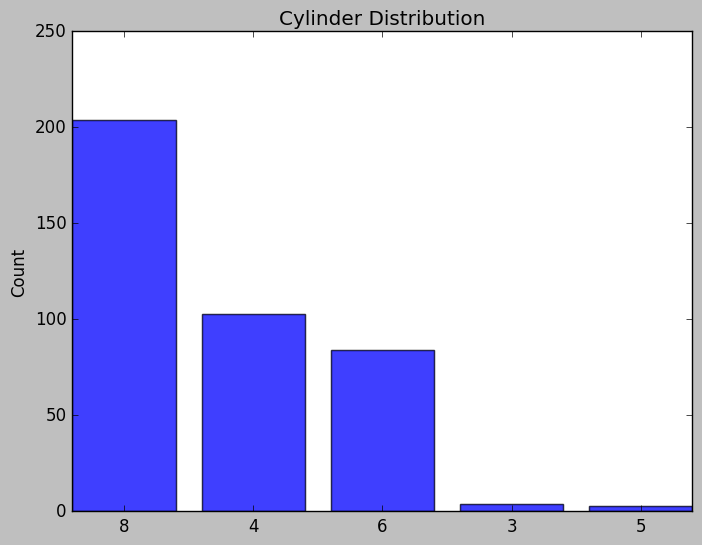

In [13]:
objects = cylinders
y_pos = np.arange(len(objects))
data = counts
plt.bar(y_pos, data, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Cylinder Distribution')
plt.show()

### What we see from the data is that the most common value for number of cylinders is 8. And not surprisingly, we see that the odd-numbered cylinder values are very low. From my experience with car-shopping, odd-numbered cylinder engines are hard to find. Many different reasons are described in articles online.

here is one explanation: http://mechanics.stackexchange.com/questions/17281/why-are-most-engines-made-with-even-numbers-of-cylinders

using the example found at https://pythonspot.com/en/matplotlib-scatterplot/ I created the scatter plot diagram

I configure the variables that I will use in the diagram

In [16]:
N = 398
x = df['weight']
y = df['horsepower']
colors = (0,0,0)
area = np.pi*3

Below is the actual plot of the data

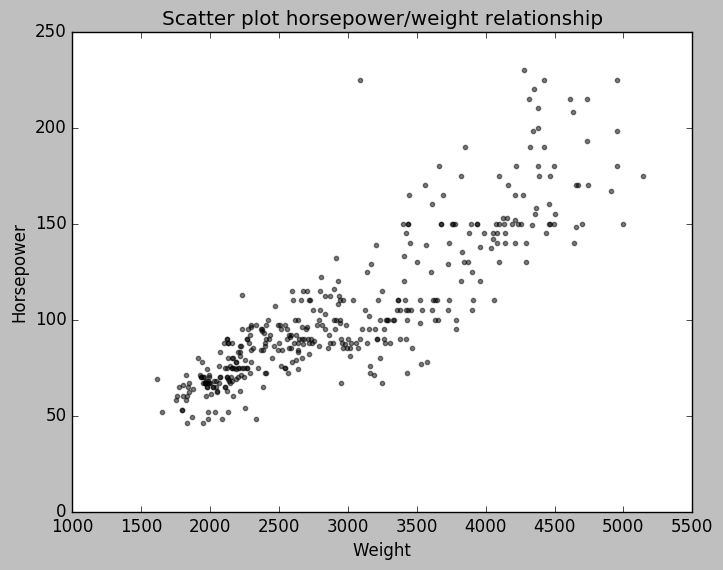

In [17]:
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot horsepower/weight relationship')
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.show()

The data shows that as the weight of the car increases so does the amount of horsepower. The sweet spot for weight to horspower ratio seems to be around 2000 pounds and 70 horsepower. There is an obvious outlier. A little over 3000 pounds with around 240 horsepower. That car could be used on the track.

For the final exercise involving seaborn I decided to create a Multiple linear regression diagram. example found here: http://seaborn.pydata.org/examples/multiple_regression.html

I wanted to see what happens to MPG as the weight of the car increases. And which region has the heaviest cars.

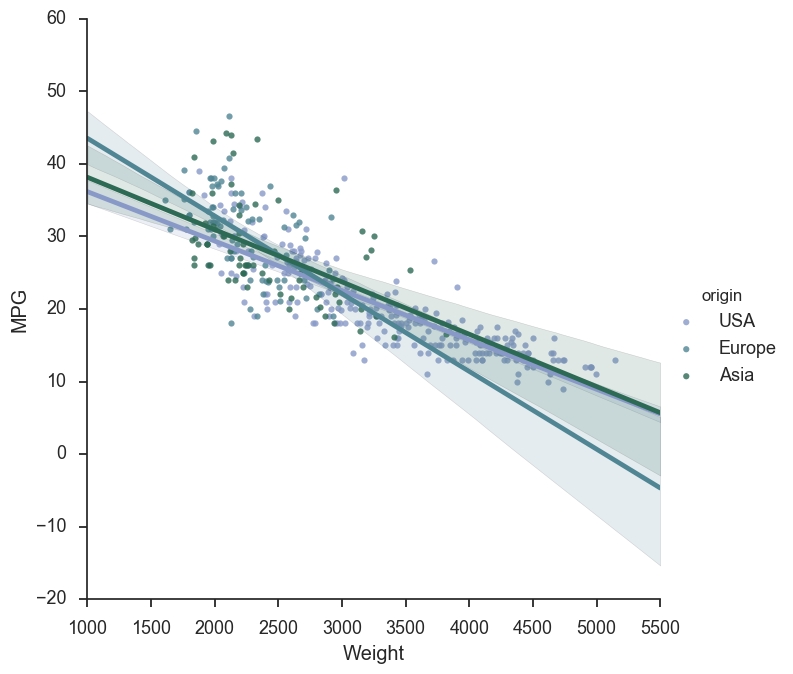

In [21]:
sns.set(style="ticks", context="talk")
new_df = df[['weight', 'mpg', 'origin']]
pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)
g = sns.lmplot(x='weight', y='mpg', hue='origin', data=new_df, palette=pal, size=7)
g.set_axis_labels("Weight", "MPG")
sns.plt.show()

The data shows that as the weight of the car increases the MPG decreases (Probably due to more cylinders and larger displacement engines). And the USA is the biggest offender in this category. 